# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

---
---
# Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

---
---

**The goal is to analyze a dataset containing information on used cars to identify the key factors influencing their prices. This data task involves exploring and understanding the dataset to uncover patterns and correlations that contribute to variations in car prices. The outcome should be actionable insights and recommendations for a used car dealership, helping them price their car competitively.**

---
---
# Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

---
---

### Library Installations for Part 1

In [55]:
# !pip install pandas
# !pip install seaborn
# !pip install plotly
# !pip install matplotlib
# !pip install scipy
# !pip install scikit-learn
# !pip install numpy

---
### Library Imports for Part 1

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, yeojohnson

---
### Load Dataset

In [57]:
df = pd.read_csv('data/vehicles.csv')

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)
df.sample(1)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
267203,7311316436,buffalo,29990,2012.0,mercedes-benz,c-class c 63 amg,good,NaN,other,95762.0,clean,other,WDDGJ7HB2CF815012,NaN,NaN,coupe,black,ny


---
### Data Overview
- Overview of data

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

---
### Describing Data
- Summary statistics for numerical features

In [59]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


---
### Looking at Missing Values
- visualize the missing values using a heatmap

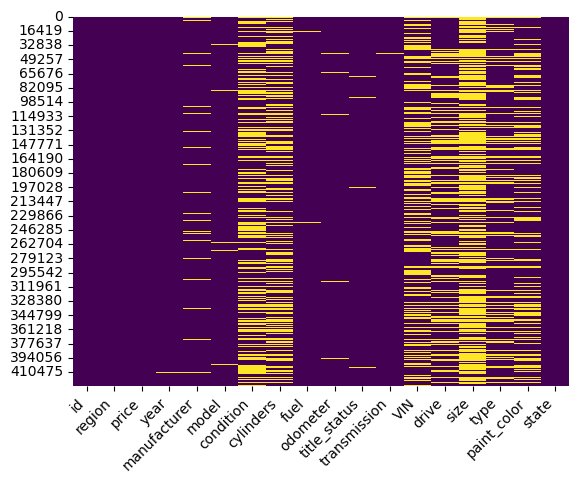

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.close()

---
### Visualizing Correlation of Numeric Columns
- Correlation matrix

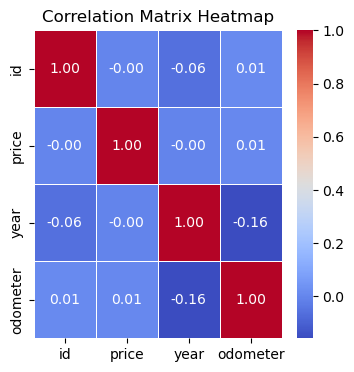

In [61]:
correlation_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

---
### Looking at Unique Values in Columns

In [62]:
df.nunique()

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

---
### <u>Outlier Visualization</u>
- **Implementing Exploratory Data Analysis (EDA)**
- **Initially dropping NAN values for exploring data**
<br>
- **Goal:**
    - Visualize outliers and get a baseline for data understanding
- **Plot Types (Numeric):**
    - Violin
    - Box
    - Scatter
    - Histogram of ('Target Variable') = 'Price'
- **Plot Types (Categoric):**
    - Bar
    - Line

---
### Implementing Exploratory Data Analysis (EDA)

- Initally dropping NAN values to visualize

In [63]:
df.dropna(inplace=True)

C:\Users\CAG\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x300 with 0 Axes>

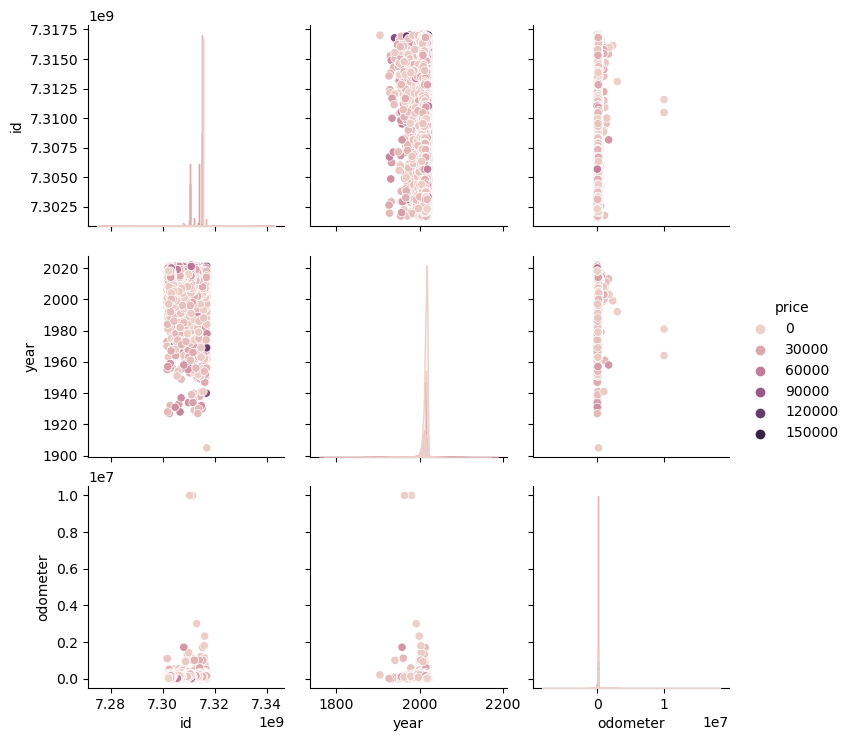

In [64]:
plt.figure(figsize=(6, 3))
sns.pairplot(df, hue="price")

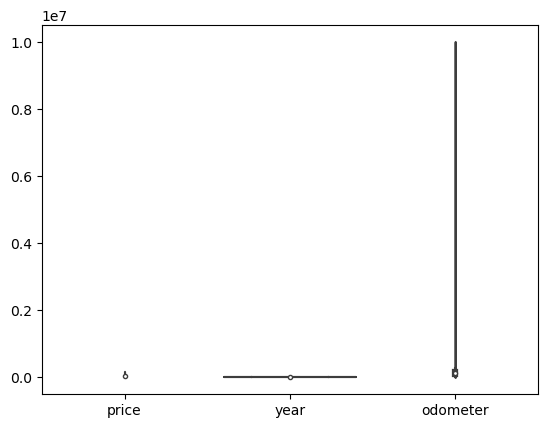

In [65]:
sns.violinplot(df[['price', 'year', 'odometer']])
plt.show()

<Figure size 600x300 with 0 Axes>

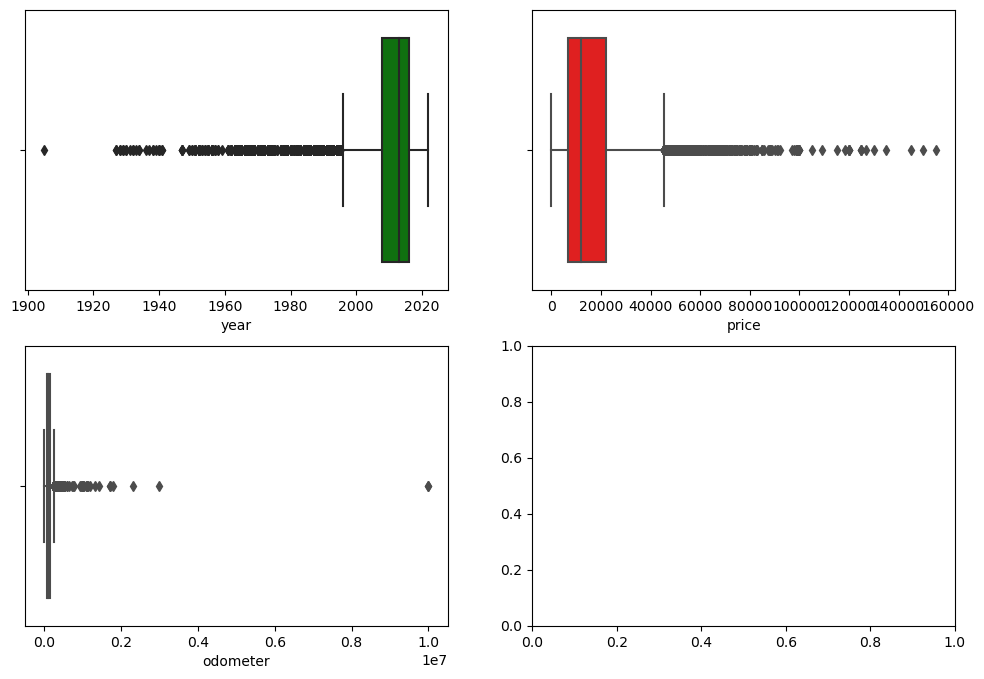

In [66]:
plt.figure(figsize=(6, 3))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.boxplot(x='year', data=df, ax=axes[0, 0], color='green')
sns.boxplot(x='price', data=df, ax=axes[0, 1], color='red')
sns.boxplot(x='odometer', data=df, ax=axes[1, 0], color='blue')
plt.show()

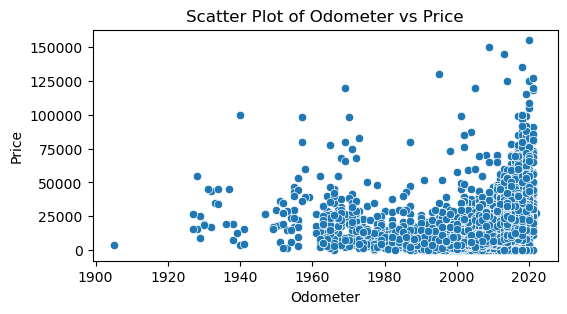

In [67]:
plt.figure(figsize=(6, 3))
sns.scatterplot(x='year', y='price', data=df)
plt.title('Scatter Plot of Odometer vs Price')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()


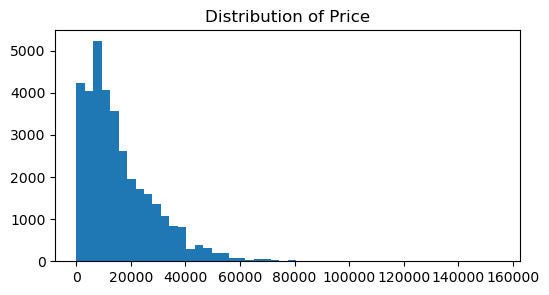

In [68]:
plt.figure(figsize=(6, 3))
plt.hist(df['price'], bins=50)
plt.title('Distribution of Price')
plt.show()

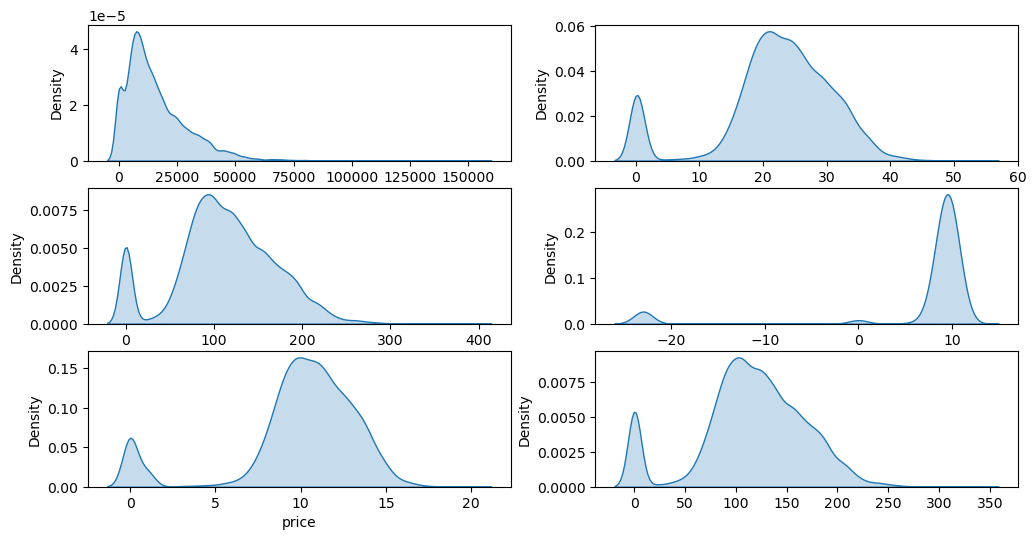

Price (not adjusted): 1.6238509474272491
Price (sqrt): -0.01559822079757113
Price (**1/3): -0.8881740839229676
Price (**1/4): -1.453654284335645
Price (log): -3.2590402912997907
Price (yeojohnson): -0.3928645102684319



In [69]:
non_adj = df['price']
sqrt = np.sqrt(df['price'])
third = df['price']**(1/3)
cube = df['price']**(1/4)
log_norm = np.log(df['price'] + 1e-10)  # Adding a small constant to avoid log(0)
lmda = yeojohnson(non_adj)[-1]
yeo = skew(yeojohnson(non_adj, lmda))



fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 6))
sns.kdeplot(non_adj, fill=True, ax=axes[0, 0])
sns.kdeplot(sqrt, fill=True, ax=axes[1, 0])
sns.kdeplot(third, fill=True, ax=axes[0, 1])
sns.kdeplot(log_norm, fill=True, ax=axes[1, 1])
sns.kdeplot(cube, fill=True, ax=axes[2, 0])
sns.kdeplot(yeojohnson(non_adj, lmda), fill=True, ax=axes[2, 1])

plt.show()

print(f"\
Price (not adjusted): {non_adj.skew()}\n\
Price (sqrt): {sqrt.skew()}\n\
Price (**1/3): {third.skew()}\n\
Price (**1/4): {cube.skew()}\n\
Price (log): {log_norm.skew()}\n\
Price (yeojohnson): {yeo}\n\
")

---
---
# Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

---
### Library Installations for Data Preparation

In [70]:
# !pip install pandas
# !pip install seaborn
# !pip install plotly
# !pip install matplotlib
# !pip install scipy
# !pip install scikit-learn
# !pip install numpy
# !pip install category_encoders
# !pip install psutil

---
### Library Imports for Data Preparation

In [71]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.decomposition import PCA, IncrementalPCA, TruncatedSVD
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler, PolynomialFeatures, FunctionTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile, chi2, SequentialFeatureSelector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.inspection import permutation_importance
# from numpy.random import randint
from scipy.stats import randint, zscore, skew, yeojohnson
import matplotlib.pyplot as plt
import category_encoders as ce
import seaborn as sns
import numpy as np
import pandas as pd
import numpy as np
import psutil
import torch

---
### Re-Import Dataset for Data Preparation
- to ensure no modifications were made

In [72]:
df = pd.read_csv('data/vehicles.csv')

---
### Clean Model Column

- After exploring the data, I found that the model column not only had data for the car model, but also contained data for other columns as well.
- In this code I will loop through 'model' column and extract the data that was supposed to be for other columns
- I am attempted to fully clean the model column but am unsure that I will be able to fully clean it so it may have to be removed before modeling

In [73]:
def clean_model_column(df, column_name, words_to_check, target_column):
    
    # FUNCTION EXPLAINED:
    # --------------------------------------
    # Setting up the 'model' cells to be split
    # Filter only rows where 'model' is not NaN
    # Words to check and move to target column
    # Additional checks to remove duplicate or other unique values from 'model'
    # Join the remaining words in 'model_words' back together
    # Update the original DataFrame with the changes
    # --------------------------------------
    
    # Setup
    words_to_check_lower = [word.lower() for word in words_to_check]
    
    # Filter
    model_not_na = df['model'].notna()
    df_filtered = df[model_not_na].copy()
    df_filtered['model_words'] = df_filtered['model'].str.lower().str.split()

    # Words to check
    df_filtered[f'match_{column_name}'] = df_filtered['model_words'].apply(lambda x: any(word in x for word in words_to_check_lower))
    df_filtered.loc[df_filtered[f'match_{column_name}'] & df_filtered[target_column].isna(), target_column] = df_filtered['model_words'].apply(lambda x: next((word for word in x if word in words_to_check_lower), None))
    df_filtered['model_words'] = df_filtered.apply(lambda row: [w for w in row['model_words'] if w not in words_to_check_lower], axis=1)

    # Additional checks
    unique_words = np.concatenate([df[col].dropna().str.lower().unique() for col in [column_name, 'type', 'manufacturer', 'drive', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'paint_color']])
    df_filtered['model_words'] = df_filtered['model_words'].apply(lambda x: [w for w in x if w not in unique_words])

    # Join
    df_filtered['model'] = df_filtered['model_words'].apply(lambda x: ' '.join(x))

    # Update
    df.loc[model_not_na] = df_filtered.drop(columns=[f'match_{column_name}', 'model_words'])


In [74]:
columns_to_process = ['type', 'manufacturer', 'drive', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'paint_color']

for column in columns_to_process:
    words_to_check = df[column].dropna().unique()
    if column == 'manufacturer':
        words_to_check = np.concatenate([words_to_check, ['genesis', 'scion','cheverolet', 'polaris', 'mclaren','packard', 'isuzu', 'freightliner', 'oldsmobile']])
    elif column == 'cylinders':
        words_to_check = np.concatenate([words_to_check, ['v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10','v11', 'v12', 
                                                          '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
                                                          'other', '3 cylinders', '10 cylinders', '12 cylinders'
                                                         ]])
    clean_model_column(df, column, words_to_check, column)
print(f"Number of unique values for 'model' column: {df['model'].nunique()}")

Number of unique values for 'model' column: 25238


---
### Clean Cylinder Column
- keep all values in cylinders where there is actual cylinder values
- remove the words 'cylinders' | 'v' from each cell
- double check cylinder's columns unique values
- converting 'cylinders' column to a numeric column from 'str' to 'float'

In [75]:
df = df[df['cylinders'] != 'other']
df['cylinders'] = df['cylinders'].str.replace(' cylinders|v', '', regex=True)
df['cylinders'].unique()
df['cylinders'] = pd.to_numeric(df['cylinders'], errors='coerce')

---
### Drop Unnecessary Columns
- 'id' not relevant to price
- 'VIN' not relevant to price
- 'size' is OPTIONAL as it's missing 3/4 of data in database
- 'model' is being dropped as it has over 25,000 unique values after attempting to clean it.

In [76]:
if ('id' in df.columns) | ('VIN' in df.columns)| ('model' in df.columns):
    df = df.drop(columns=['id', 'VIN', 'model'])

df.columns

Index(['region', 'price', 'year', 'manufacturer', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state'],
      dtype='object')

---
### Handle Missing Values
**2 Methods:** 
   - remove every row with missing data
   - fill missing data by using mean median mode

In [77]:
df.dropna(inplace=True)

In [78]:
# METHOD 2:
# Replace NaN with 'UNKNOWN' for object columns
# Replace NaN with 0 for numerical columns
# for column in df.columns:
#     if df.dtypes[column] == object:
#         df[column].fillna(f'UNKNOWN_{column}', inplace=True) 
#     else: 
#         df[column].fillna(0, inplace=True)  


# Verify that there are no more missing values
# print(df.isnull().any())
# print(df.info())

---
### Adding New Features
**Feature 1: 'age'**
- adding the 'age' of the car to show how old it is in comparison to the current year.

**OPTIONAL: Feature 2: 'kilometers'**
- adding the OPTION for conversion from 'miles' to 'kilometers' to allow universal interpretation for client.
- ***uncomment code to add feature***

In [79]:
# Create a new feature 'age' based on the 'year' of the car
df['age'] = 2023 - df['year']

# Convert odometer from miles to kilometers
# df['odometer_km'] = df['odometer'] * 1.60934

num_cols = df.select_dtypes(include=['number']).columns.to_list()
print(f"Numeric Columns: {num_cols}")

Numeric Columns: ['price', 'year', 'cylinders', 'odometer', 'age']


In [80]:
df.dropna(inplace=True)

---
### Data-Type Converting
- converting numeric columns to int64 instead of float
- I am keeping odometer as float to keep data integrity

In [81]:
print(f'\nNUMERIC DTYPES UNTOUCHED:\n{df[num_cols].dtypes}\n')
# ------
# SETUP:
# ------
# get every numeric column
# removing odometer column to keep it at a float
num_cols = df.select_dtypes(include='number').columns.to_list()
num_cols.remove('odometer')
num_cols.remove('price')
print(f"Numeric Features to Convert:\n{num_cols}")

# ------
# CONVERSION:
# ------
# converting numeric columns to type int
df[num_cols] = df[num_cols].astype('int64')
df['odometer'] = df['odometer'].astype('float64')
num_cols.append('odometer')
num_cols.append('price')

# ------
# AFTER
# ------
print(f'\nNUMERIC DTYPES FIXED:\n{df[num_cols].dtypes}\n')


NUMERIC DTYPES UNTOUCHED:
price          int64
year         float64
cylinders    float64
odometer     float64
age          float64
dtype: object

Numeric Features to Convert:
['year', 'cylinders', 'age']

NUMERIC DTYPES FIXED:
year           int64
cylinders      int64
age            int64
odometer     float64
price          int64
dtype: object



---
### Adjusting Skew of Target Variable
- As we can see in part 1, the skew of the target variable is very right skewed
- I will use the closest skew to 0 which was the square root of our target variable
- **Reason:** If I don't change the skew our machine learning model will be imbalanced and create problems like biases or false-positives and false-negatives

In [82]:
print(f"Number of rows: {df.shape[0]}")

Number of rows: 80973


In [83]:
def get_best_skew(data, transformations):
    closest_skewness_diff = float('inf')  # Initialize to positive infinity
    best_skew = None
    
    for name, value in transformations.items():
        skew_val = skew(value, nan_policy='omit')
        skewness_diff = abs(skew_val)
        print(f"{name:<25}: {skew_val: .6f}")
        if skewness_diff < closest_skewness_diff:
            best_skew = name
            closest_skewness_diff = skewness_diff
            
    print(f'{best_skew} was closest to 0 with a value of: {closest_skewness_diff}')
    return best_skew

In [84]:
# Getting best lambda
lmda = yeojohnson(df['price'])[-1]

transformations = {
    "Square Root of Price": np.sqrt(df['price']),
    "1/3 Power of Price": df['price']**(1/3),
    "1/4 Power of Price": df['price']**(1/4),
    "1/5 Power of Price": df['price']**(1/5),
    "1/6 Power of Price": df['price']**(1/6),
    "log_norm of Price": np.log(df['price'] + 1e-10),
    "log_1p of Price": np.log1p(df['price']),
    "log_2p of Price": np.log2(df['price'] + 1e-10),
    "log_10 of Price": np.log10(df['price'] + 1e-10),
    "yeojohnson of Price": yeojohnson(df['price'], lmda)
}

print(f"Price skewness: {df['price'].skew()}")

best_skew = get_best_skew(df['price'], transformations)

if best_skew:
    df['price'] = transformations[best_skew]
else:
    print("No transformation found to significantly reduce skewness.")


Price skewness: 255.9560716499706
Square Root of Price     :  186.684988
1/3 Power of Price       :  47.489091
1/4 Power of Price       :  6.112885
1/5 Power of Price       :  0.127940
1/6 Power of Price       : -1.434496
log_norm of Price        : -4.242417
log_1p of Price          : -2.928202
log_2p of Price          : -4.242417
log_10 of Price          : -4.242417
yeojohnson of Price      :  3.320327
1/5 Power of Price was closest to 0 with a value of: 0.1279399756050729


---
### Handling Outliers
**2 Methods:**
- #### Interquartile Range (IQR):
    - IQR when data doesn't follow bell curve
    - I am 'capping'outliers instead of removing them
    - ***CODE:*** df[col] = df[col].clip(lower_bound, upper_bound)
    - ***Optionally*** there is the ability to remove outliers within each column
    - ***CODE:*** df = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]
    </br></br>
    - **Skewness after IQR:** -0.21142773
- #### Z-Score:
    - Z-scores measure how many standard deviations a data point is away from the mean. Values with high z-scores (e.g., above 3 or below -3) are considered potential outliers.
    - I am 'capping'outliers instead of removing them
    - ***CODE:*** df[col].clip(lower=df[col].mean() - 3 * df[col].std(), upper=df[col].mean() + 3 * df[col].std(), inplace=True)
    - ***Optionally*** there is the ability to remove outliers within each column
    - ***CODE:*** df = df[~df[col].isin(outliers)]
    </br></br>
    - **Skewness after Z-score:** -1.50074515

In [85]:
for col in df[num_cols]:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.25 * iqr
    upper_bound = q3 + 1.25 * iqr

    df[col] = df[col].clip(lower_bound, upper_bound)
    
    
print(df.shape[0])
round(df['price'].skew(),8)

80973


-0.21142773

In [86]:
# for col in df[num_cols]:
#     z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
#     outliers = df[col][z_scores > 3]

#     df[col].clip(lower=df[col].mean() - 3 * df[col].std(), upper=df[col].mean() + 3 * df[col].std(), inplace=True)


# print(df.shape[0])
# round(df['price'].skew(), 8)

---
### Separate Target Variable
- Separate features (X) and target variable (y)

In [87]:
# Separate features (X) and target variable (y) *after* outlier removal
X = df.drop('price', axis=1)
y = df['price']
df.shape[0]

80973

---
### Separate D-Type Features
- separate categorical and numerical features

In [88]:
numerical_features = df.select_dtypes(include=['number']).columns.to_list()
numerical_features.remove('price')
categorical_features = df.select_dtypes(exclude=['number']).columns.to_list()

print(f"Numerical Columns:\n{list(numerical_features)}\n")
print(f"Categorical Columns:\n{list(categorical_features)}\n")

Numerical Columns:
['year', 'cylinders', 'odometer', 'age']

Categorical Columns:
['region', 'manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']



---
### Initialize Polynomial Features
- Initialize polynomial features to handle the non-linear numeric columns

In [89]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)

---
### Build D-Type Pipelines
- Build dtype pipelines to handle the different features

In [90]:
numerical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")), 
           ("scaler", StandardScaler()),
           ("poly", poly_features),
          ]
)
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)

---
### Preprocess Transformers
- Build column transformer to handle the numeric and categoric pipelines

In [91]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

---
### Initialize Sequential Feature Selector
- Initialize to handle features that are not necessary by using the n_features_to_select=4

In [92]:
sfs = SequentialFeatureSelector(
        estimator=LinearRegression(),
        n_features_to_select=10,
        scoring = 'neg_mean_squared_error')

---
### Build Model Pipelines
- first is adjusted before fitting
- second is doing everything in the pipeline

In [93]:
linear_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("feature_selector", sfs),
        ("model", LinearRegression(fit_intercept=True))
    ]
)

lasso_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("feature_selector", sfs),
        ("model", Lasso(random_state=42))
    ]
)

ridge_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("feature_selector", sfs),
        ("model", Ridge())
    ]
)


---
### Splitting Train and Test Data
- Split the data into training and testing sets

In [94]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---
---
# Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

---
### Fitting Models
**ORDER:**
- Linear Regression
- Lasso Regression
- Ridge Regression

In [95]:
linear_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=4,
                                                                                      include_bias=False))]),
                                                  ['year', 'cylinders',
                                                   'odometer', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['region', 'manufacturer',
                                                   'condition', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color', 'state'])])),
                ('feature_selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=10,
                                           scoring='neg_mean_squared_error')),
                ('model', LinearRegression())])

In [96]:
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=4,
                                                                                      include_bias=False))]),
                                                  ['year', 'cylinders',
                                                   'odometer', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['region', 'manufacturer',
                                                   'condition', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color', 'state'])])),
                ('feature_selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=10,
                                           scoring='neg_mean_squared_error')),
                ('model', Lasso(random_state=42))])

In [97]:
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=4,
                                                                                      include_bias=False))]),
                                                  ['year', 'cylinders',
                                                   'odometer', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['region', 'manufacturer',
                                                   'condition', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color', 'state'])])),
                ('feature_selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=10,
                                           scoring='neg_mean_squared_error')),
                ('model', Ridge())])

---
### Hyper Parameter Tuning
- Using RandomSearch & GridSearch to find the best hyperparameters for ML models


In [98]:
def perform_grid_search(model_name, pipeline, param_grid, X_train, y_train):

    grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {model_name}:\n{grid_search.best_params_}\n")

def perform_random_search(model_name, pipeline, param_grid, X_train, y_train):
    
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, 
                                       cv=5, scoring='r2', n_iter=50, random_state=42)
    random_search.fit(X_train, y_train)
    print(f"Best parameters for {model_name}:\n{random_search.best_params_}\n")#### HYPER PARAMETER TUNING

- Establishing the grid parameters to be tested in the search functions

In [99]:
# Hyperparameter dictionaries
params_lasso = {
    'classifier__alpha': [0.001, 0.01, 0.1, 1, 10],
    'classifier__max_iter': range(2000, 1000001),
}

params_ridge = {
    'classifier__alpha': [0.001, 0.01, 0.1, 1, 10],
    'classifier__max_iter': range(2000, 1000001),
}


In [100]:
# perform_grid_search("Lasso Regression", lasso_pipe, params_lasso, X_train, y_train)
# perform_random_search("Lasso Regression", lasso_pipe, params_lasso, X_train, y_train)

In [101]:
# perform_grid_search("Ridge Regression", ridge_pipe, params_ridge, X_train, y_train)
# perform_random_search("Ridge Regression", ridge_pipe, params_ridge, X_train, y_train)

---
---
# Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

---
### Run Evaluation on Models


***Linear Regression:***
- Mean Squared Error: 1.1219794919459456
- Mean Absolute Error: 0.7203971219464248
- R-squared: 0.29398154932121345
- Cross-validated MSE: 1.1421596325997254

***Lasso Regression:***
- Mean Squared Error: 1.589179811619789
- Mean Absolute Error: 0.9946950623538738
- R-squared: -9.604902710735885e-06
- Cross-validated MSE: 1.5939281016382676

***Ridge Regression:***
- Mean Squared Error: 1.1219817761280084
- Mean Absolute Error: 0.7204021624611179
- R-squared: 0.29398011197347884
- Cross-validated MSE: 1.1421591187403037

In [102]:
# Evaluate Models
def evaluate_model(model, X_test, y_test):
    model_name = model.named_steps['model'].__class__.__name__
    y_pred = model.predict(X_test)
    y_pred = np.clip(y_pred, a_min=None, a_max=np.percentile(y_pred, 99))  # Clip extreme values
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Cross-validated MSE for Linear Regression Model
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    print(f"\nModel Evaluation ({model_name}):")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")
    print("Cross-validated MSE:", -scores.mean())
    
def feature_importance(model, X_test, y_test):
    model_name = model.named_steps['model'].__class__.__name__
    
    # Fit the model on the test set
    model.fit(X_test, y_test)
    
    # Get feature importances using permutation importance
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    feature_importances = result.importances_mean
    
    # Check if sum of feature importances is not zero
    if feature_importances.sum() != 0:
        # Normalize feature importances
        feature_importances /= feature_importances.sum()
    else:
        # Handle the case where all feature importances are zero
        print("Warning: All feature importances are zero. Cannot normalize.")
        return
    
    # Sort features by importance
    sorted_indices = feature_importances.argsort()[::-1]
    
    print(f"\nFeature Importance ({model_name}):")
    for i, index in enumerate(sorted_indices):
        feature_name = X_test.columns[index]
        importance_percentage = feature_importances[index] * 100
        print(f"{i + 1}. {feature_name}: {importance_percentage:.2f}%")


In [103]:
# Evaluate Linear Regression Model
evaluate_model(linear_pipe, X_test, y_test)


Model Evaluation (LinearRegression):
Mean Squared Error: 0.9730637818140226
Mean Absolute Error: 0.6485087717991889
R-squared: 0.3867743865391198
Cross-validated MSE: 1.072280708605067


In [104]:
# Evaluate Lasso Regression Model
evaluate_model(lasso_pipe, X_test, y_test)


Model Evaluation (Lasso):
Mean Squared Error: 1.5868402911570867
Mean Absolute Error: 0.993532067416577
R-squared: -2.8085718258630266e-05
Cross-validated MSE: 1.5944078568469355


In [105]:
# Evaluate Ridge Regression Model
evaluate_model(ridge_pipe, X_test, y_test)


Model Evaluation (Ridge):
Mean Squared Error: 0.9730691783088993
Mean Absolute Error: 0.6485245631177331
R-squared: 0.3867709856635111
Cross-validated MSE: 1.0722750038515243


---
### Feature Importance
- executing the function to show which features played the biggest coorelation as to what affects our target variable

In [106]:
feature_importance(linear_pipe, X_test, y_test)


Feature Importance (LinearRegression):
1. year: 41.95%
2. odometer: 11.34%
3. fuel: 10.72%
4. age: 8.09%
5. cylinders: 7.96%
6. transmission: 6.32%
7. drive: 5.70%
8. condition: 3.10%
9. state: 2.72%
10. type: 2.11%
11. paint_color: 0.00%
12. size: 0.00%
13. title_status: 0.00%
14. manufacturer: 0.00%
15. region: 0.00%


In [107]:
feature_importance(lasso_pipe, X_test, y_test)

In [108]:
feature_importance(ridge_pipe, X_test, y_test)


Feature Importance (Ridge):
1. year: 41.96%
2. odometer: 11.35%
3. fuel: 10.72%
4. age: 8.08%
5. cylinders: 7.97%
6. transmission: 6.29%
7. drive: 5.70%
8. condition: 3.10%
9. state: 2.72%
10. type: 2.12%
11. paint_color: 0.00%
12. size: 0.00%
13. title_status: 0.00%
14. manufacturer: 0.00%
15. region: 0.00%


---
---
# Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

---
### Deliverables
